In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA = df[df['job_title_short']=='Data Analyst'].copy()

In [3]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

In [4]:
df_DA_explode = df_DA.explode('job_skills')

df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns= 'job_skills', aggfunc='size', fill_value=0)

In [5]:
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()

df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_pivot = df_DA_pivot.drop('Total')

<Axes: xlabel='job_posted_month_no'>

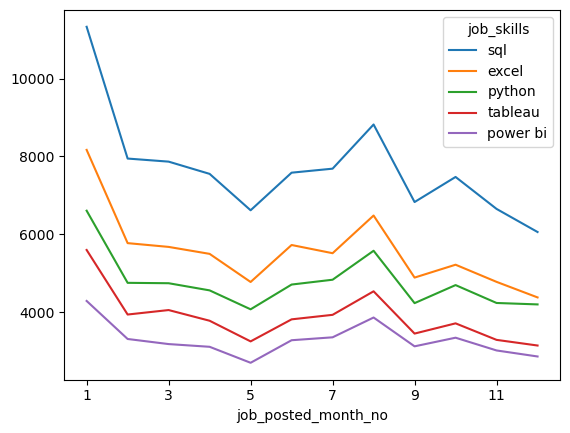

In [7]:
df_DA_pivot.iloc[:,:5].plot(kind='line')

Problems

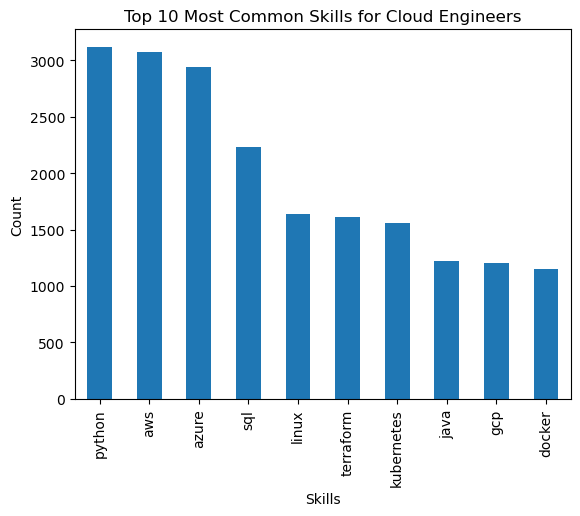

In [8]:
df_CE = df[df['job_title_short'] == 'Cloud Engineer']
df_exploded = df_CE.explode('job_skills')
skill_counts = df_exploded['job_skills'].value_counts().head(10)
skill_counts.plot(kind='bar')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.title('Top 10 Most Common Skills for Cloud Engineers')
plt.show()

In [17]:
df_exploded = df.explode('job_skills')
skill_salary_avg = df_exploded.groupby('job_skills')['salary_year_avg'].mean().reset_index()
skill_salary_avg = skill_salary_avg.sort_values(by='salary_year_avg', ascending=False).head()

skill_salary_avg

,job_skills,salary_year_avg
46,debian,196500.000000
177,ringcentral,182500.000000
114,lua,170500.000000
126,mongo,169526.929749
54,dplyr,160667.210526


In [24]:
df_exploded = df.explode('job_skills')
unique_skills_count = df_exploded.groupby('job_title_short')['job_skills'].nunique().reset_index()

unique_skills_count.columns = ['job_title_short', 'num_unique_skills']
unique_skills_count.head()

,job_title_short,num_unique_skills
0,Business Analyst,223
1,Cloud Engineer,213
2,Data Analyst,235
3,Data Engineer,239
4,Data Scientist,237
